# Objective 

#### Analyze the data and draw conclusions on the distribution and nature of crime in Montreal City. 

## Insights to Gather

1. What are the top 3 prevalent crimes or offenses committed in Montreal City?
2. What part of the day did most crime incidents occur?
3. Which top 5 police precincts (PDQ) got the most crime complaints?
4. Which are the top 3 PDQs that got the least crime complaints?
5. Which neighborhoods recorded the highest crime incidents and what are the crime types in these neighborhoods?
6. Which neighborhood has the most cases of murder?

In [118]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# importing csv and storing it under variable df
df = pd.read_csv('data/actes-criminels.csv')

# looking at ten random samples in the dataset
df.sample(n = 10, random_state = 42)

,Categorie,Category,Date,Time of Day,PDQ,x,y,Latitude,Longitude
239171,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-21,nuit,5.0,286738.781,5034640.500,-73.730911,45.451461
241143,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-13,soir,46.0,301170.719,5052541.000,-73.546533,45.612761
71477,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2017-04-08,soir,35.0,NaN,NaN,NaN,NaN
220515,Méfait,Mischief,2022-02-03,soir,26.0,296411.468,5039514.749,-73.607330,45.495505
145543,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2019-10-20,nuit,38.0,298718.852,5040797.622,-73.577823,45.507073
8442,Vol de véhicule à moteur,Theft of Motor Vehicle,2016-02-01,nuit,39.0,294232.206,5049929.965,-73.635438,45.589195
141468,Vols qualifiés,Robbery,2019-05-29,jour,23.0,301924.195,5046352.614,-73.536836,45.557079
130051,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2018-12-01,jour,38.0,297820.809,5042397.078,-73.589339,45.521457
126634,Introduction,Breaking & Entering,2019-09-15,jour,13.0,294577.750,5031274.500,-73.630621,45.421331
65022,Vols qualifiés,Robbery,2016-11-05,soir,21.0,299962.840,5041609.764,-73.561911,45.514391


In [119]:
# taking a look at the landscape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244117 entries, 0 to 244116
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Categorie    244117 non-null  object 
 1   Category     244117 non-null  object 
 2   Date         244117 non-null  object 
 3   Time of Day  244117 non-null  object 
 4   PDQ          244112 non-null  float64
 5   x            202724 non-null  float64
 6   y            202724 non-null  float64
 7   Latitude     202724 non-null  float64
 8   Longitude    202724 non-null  float64
dtypes: float64(5), object(4)
memory usage: 16.8+ MB


In [120]:
# searching for null values by column
df.isnull().sum()

Categorie          0
Category           0
Date               0
Time of Day        0
PDQ                5
x              41393
y              41393
Latitude       41393
Longitude      41393
dtype: int64

In [121]:
# getting a quick statistical overview of numerical values in dataset
# also rounding the decimals to the second decimal point
round(df.describe(),2)

,PDQ,x,y,Latitude,Longitude
count,244112.00,202724.00,202724.00,202724.00,202724.00
mean,26.32,295794.17,5043227.57,-73.62,45.53
std,14.03,6085.98,6070.39,0.08,0.05
min,1.00,268109.61,5029291.47,-73.97,45.40
25%,15.00,293900.98,5039087.60,-73.64,45.49
50%,26.00,297338.25,5042878.08,-73.60,45.53
75%,39.00,299665.90,5047188.21,-73.57,45.56
max,55.00,306389.86,5062496.46,-73.48,45.70


## What are the Top 3 more prevalent crimes or offenses in Montreal city?

### Steps to get there

#### There are a couple of ways to build the table

+ Option 1: Create a table by calling on the Category column directly and using the .value_counts function
### OR
+ Option 2: Create a table grouped by the Category column and using the .count function 


### Next Steps

1. Now that we have the counts, it would be helpful to know what the population of Montreal City is (Google: 1,780,000)
2. Calculate each respective crime for every 100,000 MTL residents --- > (Crime Count/ 1,780,000 Million) * 100,000
3. The results aims to provide better context around the crime (Ie. For every 100,000 residents there will be 4,061 Thefts From / To Motor Vehicle)
4. Build a visual to display the results

In [122]:
# building a table by calling on the Category column directly and applying value_counts function
# renaming both columns
dt = df['Category'].value_counts().reset_index().rename({"index" : "Crime", "Category" : "Crime Count"}, axis = 1)
dt

,Crime,Crime Count
0,Theft From / To Motor Vehicle,72291
1,Breaking & Entering,61107
2,Mischief,53720
3,Theft of Motor Vehicle,43135
4,Robbery,13639
5,Murder Resulting in Death,225


In [123]:
# creating a new column that will divide the crime count by the total population * 100000 to calculate the count by 100,000 residents
dt['per/100000'] = round((dt['Crime Count'] / 1_780_000) * 100000, 0).astype(int)

# ranking the crimes by the count descending the highest count at the top
dt['rank'] = dt['Crime Count'].rank(method = 'dense', ascending = False).astype(int)

# looking at the table to ensure the data adds up
dt

,Crime,Crime Count,per/100000,rank
0,Theft From / To Motor Vehicle,72291,4061,1
1,Breaking & Entering,61107,3433,2
2,Mischief,53720,3018,3
3,Theft of Motor Vehicle,43135,2423,4
4,Robbery,13639,766,5
5,Murder Resulting in Death,225,13,6


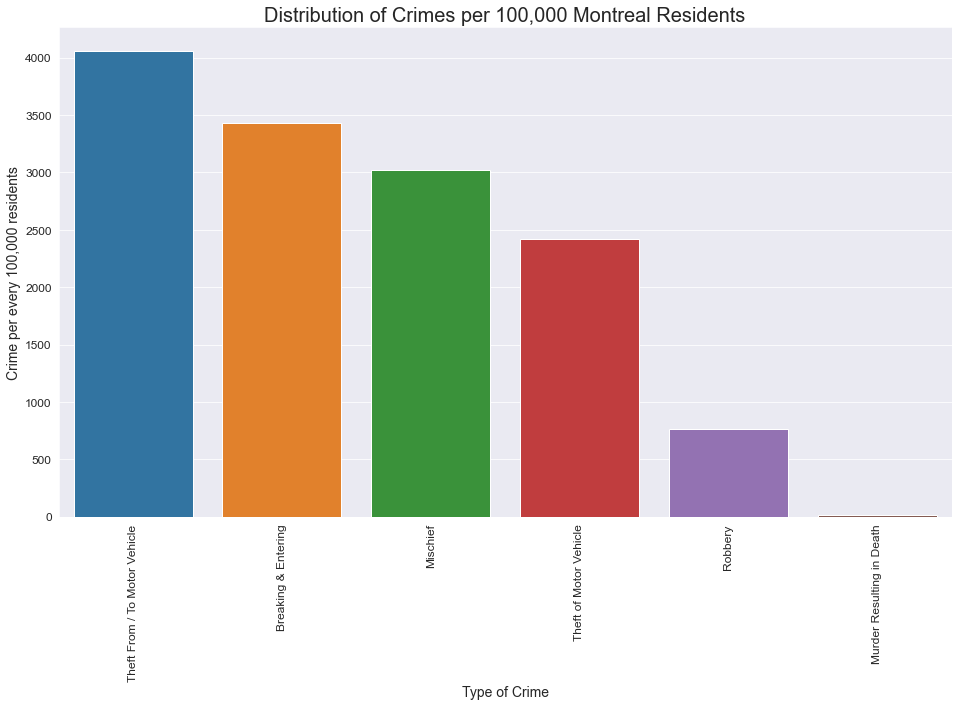

In [124]:
# setting seaborn plot style to darkgrid
sns.set_style('darkgrid')

# creating a fontsize for the title
fontsize = 20

# creating a fontsize for the horizontal and vertical titles
# will likely use it for the x and y axis
axfont = 14

# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (16,9))

# creating a barplot using seaborn and passing the Crime and count per/100000 residents as the data source
sns.barplot(x = 'Crime', y = 'per/100000', data = dt, ax = ax)

# adding a title to the chart
plt.title('Distribution of Crimes per 100,000 Montreal Residents', fontdict = {'fontsize' : fontsize})

# renaming the y-axis and increasing the font size
plt.ylabel('Crime per every 100,000 residents', fontdict = {'fontsize' : axfont})

# renaming the x-axis and increasing the font sise
plt.xlabel('Type of Crime',  fontdict = {'fontsize' : axfont})

# increasing the font size of the x and y axis labels
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# rotating the axis labels to 90 degrees
plt.xticks(rotation = 90)

# displaying chart created
plt.show();

In [125]:
# filtering the table to see which are the three most prevalent crimes 
# since we used a rank function, specifically for this scenario all that needs to be done is filter by rank where it is <= 3
top_three_crimes =  dt[dt['rank'] <= 3]

top_three_crimes

,Crime,Crime Count,per/100000,rank
0,Theft From / To Motor Vehicle,72291,4061,1
1,Breaking & Entering,61107,3433,2
2,Mischief,53720,3018,3


In [126]:
# calculating the total sum of crimes per 100,000 MTL residents
total_crime_count = top_three_crimes['per/100000'].sum()

crimes = top_three_crimes

# printing out statement
print(f"The top three most prevalent crimes in Montreal make up for {total_crime_count} incidents for every 100,000 residents in Montreal City.")

The top three most prevalent crimes in Montreal make up for 10512 incidents for every 100,000 residents in Montreal City.


### Key Takeways

#### Objective: 3 Most Prevalent Crimes

1. Theft From / to Motor Vehicle
2. Breaking & Entering
3. Mischief

+ Making up for 10,512 Incidents for every 100,000 residents in the City

### Question 2: What part of the day did most incidents occur?

#### Next Steps

+ Build a table grouped by the time of day, counting the total number of incidents per time of day
+ Create a visual to display findings

In [127]:
time_of_day = df['Time of Day'].value_counts().reset_index().rename({"index" : "Time of Day" , "Time of Day" : "Incident Count"}, axis = 1)
time_of_day

,Time of Day,Incident Count
0,jour,124382
1,soir,81612
2,nuit,38123


### Making a Change

+ Add a new column called Time of Day but in English for clarity


In [128]:
# creating a dictionary to map French time of day labels to English labels
day_dict = {"jour" : "day", "soir" : "evening", "nuit" : "night"}

# replace French time of day labels in the 'Time of Day' column with English labels
time_of_day['Time of Day (ENG)'] = time_of_day['Time of Day'].replace(day_dict)

# printing dataframe to ensure mapping worked correctly
time_of_day

,Time of Day,Incident Count,Time of Day (ENG)
0,jour,124382,day
1,soir,81612,evening
2,nuit,38123,night


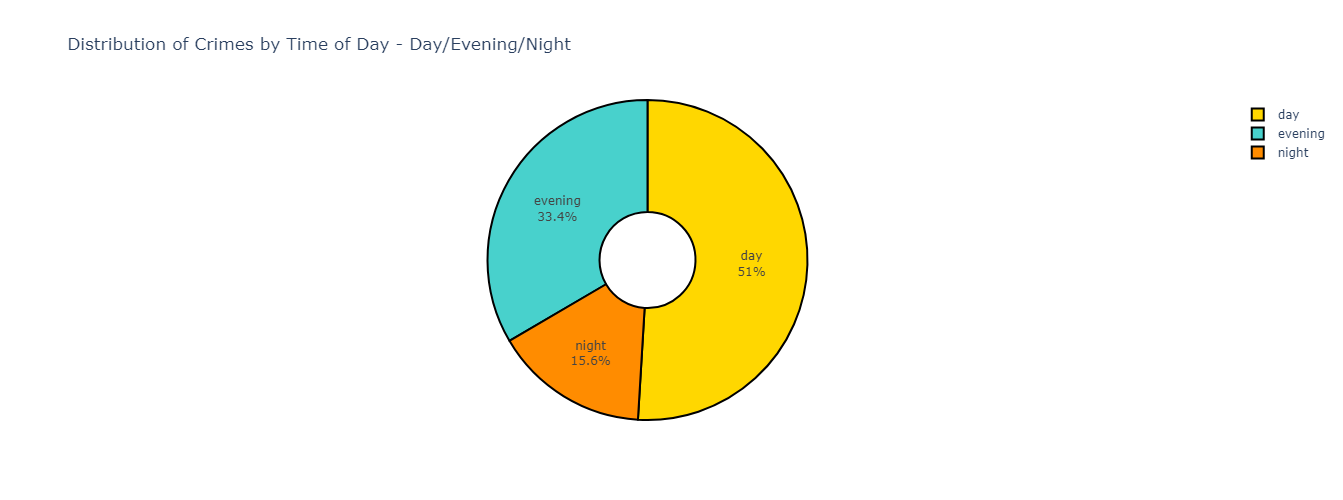

In [129]:
# importing plotly to create a pie chart visual
import plotly.express as px

# define a list of colours for the pie chart
colors = ['gold', 'mediumturquoise', 'darkorange']

# creating a pie chart using plotly express with time_of_day as the data source
fig = px.pie(data_frame = time_of_day, # data source
             values = 'Incident Count', # count by time of day 
             names = 'Time of Day (ENG)', # passing the English labels as the label 
             title = 'Distribution of Crimes by Time of Day - Day/Evening/Night', # setting the title for the pie chart
             width = 700, # width of the chart in pixels
             height = 500, # height of the chart in pixels
             hole = .3) # size of the donut hole

fig.update_traces(textposition = 'inside', # position of the text label within the pie chart
                  textinfo = 'percent+label', # format of the text labels in the chart
                  textfont_size=12, # font size of the tect labels in the chart
                  marker=dict(colors=colors, line=dict(color='#000000', width=2))) # properties of the lines separating the sections

# displaying styled chart
fig.show();

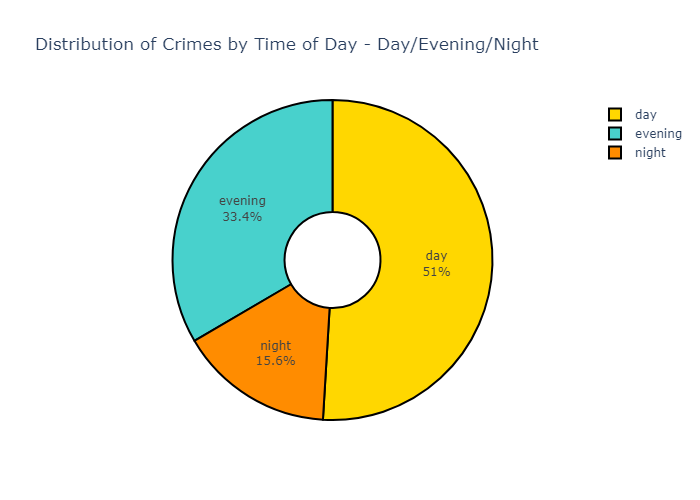

### Key Takeways

1. More than half of the crimes occur betweeen the times of 8AM to 4PM
2. 33.4% of crimes occur between 4:01 PM to Midnight
3. Lastly, 15.6% of crime occurred between 00:01 t0 8:00 AM

### Questions to consider:

+ At what time of day to the more severe crimes (Ie. Murder, or potential harm to innocent people) occurr?
+ Are there crime hot spots where the likelihood of crime is higher than in other areas?

### Question 3: Which Police Precincts (PDQ) got the most complaints?

#### Next Steps

+ Build a table grouped by the Police Precinct and the total count of crimes reported
+ Use the rank function and filter out by the Top 5 ranked Precinct based on crimes reported

In [130]:
df.sample(n = 10, random_state = 42)

,Categorie,Category,Date,Time of Day,PDQ,x,y,Latitude,Longitude
239171,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-21,nuit,5.0,286738.781,5034640.500,-73.730911,45.451461
241143,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-13,soir,46.0,301170.719,5052541.000,-73.546533,45.612761
71477,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2017-04-08,soir,35.0,NaN,NaN,NaN,NaN
220515,Méfait,Mischief,2022-02-03,soir,26.0,296411.468,5039514.749,-73.607330,45.495505
145543,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2019-10-20,nuit,38.0,298718.852,5040797.622,-73.577823,45.507073
8442,Vol de véhicule à moteur,Theft of Motor Vehicle,2016-02-01,nuit,39.0,294232.206,5049929.965,-73.635438,45.589195
141468,Vols qualifiés,Robbery,2019-05-29,jour,23.0,301924.195,5046352.614,-73.536836,45.557079
130051,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2018-12-01,jour,38.0,297820.809,5042397.078,-73.589339,45.521457
126634,Introduction,Breaking & Entering,2019-09-15,jour,13.0,294577.750,5031274.500,-73.630621,45.421331
65022,Vols qualifiés,Robbery,2016-11-05,soir,21.0,299962.840,5041609.764,-73.561911,45.514391


In [131]:
# creating a table groupeed by 'PDQ' column, count the number of occurrences of each value in the 'Time of Day' column, reset the index, and rename the 'Time of Day' column to '# of Crime Complaints'
# sorting the dataframe by crime complaints descending 
top_pdqs = df.groupby('PDQ')['Time of Day'].count().reset_index().rename({"Time of Day" : "CrimeComplaints"}, axis = 1).sort_values(by = 'CrimeComplaints', ascending = False)

# calculating % of total complaints per precinct
top_pdqs['perc of total'] = round(top_pdqs['CrimeComplaints'] / top_pdqs['CrimeComplaints'].sum() * 100, 2)

# adding a new column called complaints_rank, which is the rank of the PDQ based on the crime complaints received and converting the data type to integer
# The closer you are to 1, the higher amount of complaints received
top_pdqs['complaints_rank'] = top_pdqs['CrimeComplaints'].rank(method = 'dense', ascending = False).astype(int)

# converting PDQ into an integer from a float
top_pdqs['PDQ'] = top_pdqs['PDQ'].astype(int)

# printing out statement to understand total # of crime complaints
total_complaints = round((top_pdqs['CrimeComplaints'].sum() / 1_780_000) * 100000, 0)
print(f"The total # of Crime Complaints in Montreal City is {total_complaints} per 100,000 residents.")

# printing out table
top_pdqs

The total # of Crime Complaints in Montreal City is 13714.0 per 100,000 residents.


,PDQ,CrimeComplaints,perc of total,complaints_rank
24,38,17265,7.07,1
14,21,14326,5.87,2
13,20,13593,5.57,3
30,48,11795,4.83,4
25,39,11149,4.57,5
4,7,11072,4.54,6
18,26,10460,4.28,7
27,44,9883,4.05,8
16,23,9505,3.89,9
11,15,9264,3.79,10


## Crime Complaints Table Built..

### Next Steps

+ Filter for the Top 5 Precincts that received the most complaints by calling on the 'complaints_rank' column directly
+ Filter for the rank being less or equal to 5, which will provide the answer for the Top 5 Precincts that receive the most crime complaints

### After

+ What about the Top 3 Police Precincts that received the least crime complaints?

In [132]:
# filtering the table for the top 5 ranked police precincts in terms of crime complaints
top_5_crimes = top_pdqs[top_pdqs['complaints_rank'] <= 5]

# calculating total % of crime complaints 
perc_of_crime_total = top_5_crimes['perc of total'].sum()

# displaying the table
top_5_crimes

,PDQ,CrimeComplaints,perc of total,complaints_rank
24,38,17265,7.07,1
14,21,14326,5.87,2
13,20,13593,5.57,3
30,48,11795,4.83,4
25,39,11149,4.57,5


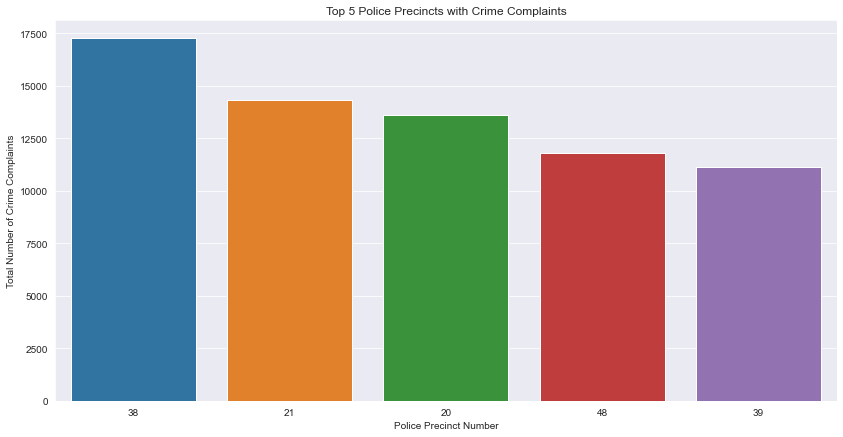

In [133]:
# create a figure and axis object with the given size
fig, ax = plt.subplots(figsize = (14,7))

# using seaborn library to create a barplot of the number of crime complaints for the top 5 police precincts
sns.barplot(x = 'PDQ', y = 'CrimeComplaints', data = top_5_crimes, order = top_5_crimes.sort_values(by = 'CrimeComplaints', ascending = False).PDQ)

# adding a title to the plot
plt.title('Top 5 Police Precincts with Crime Complaints')

# adding a label to the x-axis
plt.xlabel('Police Precinct Number')

# adding a label to the y-axis
plt.ylabel('Total Number of Crime Complaints')

# displaying the plot
plt.show();

### Question 4: Which Police Precincts (PDQ) got the most complaints?

#### Next Steps

+ Sort the top_pdqs table by rank descending, which will bring the Precincts that received the least complaints first
+ Filter the Top 3 Precincts
+ This will give the answer on the Top 3 Precincts with the least complaints

In [134]:
# sorting the top_pdqs table by rank descending
top_pdqs = top_pdqs.sort_values(by = 'complaints_rank', ascending = False)

# creating a new table with the least complaints 
bottom_3_crimes = top_pdqs[top_pdqs['complaints_rank'] >= 32]

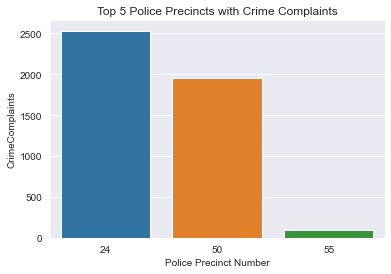

In [135]:
# using seaborn library to create a barplot of the number of crime complaints for the top 5 police precincts
sns.barplot(x = 'PDQ', y = 'CrimeComplaints', data = bottom_3_crimes)

# adding a title to the plot
plt.title('Top 5 Police Precincts with Crime Complaints')

# adding a label to the x-axis
plt.xlabel('Police Precinct Number')

# displaying the plot
plt.show();

### Question 5: Which neighborhoods recorded the highest crime incidents and what are the crime types in these neighborhoods?

In [136]:
df.sample(n = 5, random_state = 42)

,Categorie,Category,Date,Time of Day,PDQ,x,y,Latitude,Longitude
239171,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-21,nuit,5.0,286738.781,5034640.500,-73.730911,45.451461
241143,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-01-13,soir,46.0,301170.719,5052541.000,-73.546533,45.612761
71477,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2017-04-08,soir,35.0,NaN,NaN,NaN,NaN
220515,Méfait,Mischief,2022-02-03,soir,26.0,296411.468,5039514.749,-73.607330,45.495505
145543,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2019-10-20,nuit,38.0,298718.852,5040797.622,-73.577823,45.507073


In [160]:
import h3

df['hex_id'] = df.apply(func = lambda row: h3.geo_to_h3(lat = row['Latitude'], lng = row['Longitude'], resolution = 8), axis = 1)
df.sample(n = 10, random_state = 42)

,Categorie,Category,Date,Time of Day,PDQ,x,y,Latitude,Longitude,hex_id
242230,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2022-11-08,soir,26.0,293617.572,5038745.605,-73.643060,45.488545,88f0e98229fffff
78720,Méfait,Mischief,2015-12-17,jour,27.0,291491.838,5045724.686,-73.670444,45.551308,88f0e991bbfffff
120342,Vol dans / sur véhicule à moteur,Theft From / To Motor Vehicle,2019-10-24,nuit,26.0,290800.719,5039258.261,-73.679111,45.493107,88f0e9919bfffff
127467,Introduction,Breaking & Entering,2019-11-21,jour,30.0,296877.480,5046044.076,-73.601473,45.554264,88f0e98061fffff
3513,Introduction,Breaking & Entering,2017-01-06,jour,24.0,295847.969,5041840.000,-73.614582,45.516422,88f0e98045fffff
21147,Méfait,Mischief,2015-04-20,jour,48.0,300137.783,5049280.581,-73.559745,45.583417,88f0e98117fffff
60268,Vols qualifiés,Robbery,2016-01-29,soir,31.0,293680.751,5044457.048,-73.642381,45.539940,88f0e98353fffff
160882,Introduction,Breaking & Entering,2020-04-29,nuit,8.0,291689.469,5033159.500,-73.667577,45.438245,88f0e98243fffff
217401,Méfait,Mischief,2022-12-01,jour,48.0,302729.427,5049772.047,-73.526536,45.587851,88f0e981adfffff
66213,Introduction,Breaking & Entering,2016-09-18,nuit,8.0,290729.781,5032543.500,-73.679826,45.432683,88f0e98249fffff


In [162]:
import folium

m = folium.Map(location=[df['Longitude'].median(), df['Latitude'].median()],
                 zoom_start=8.5,  # after a bit of experimentation, we thought this presents the map best
                 tiles="openstreetmap")

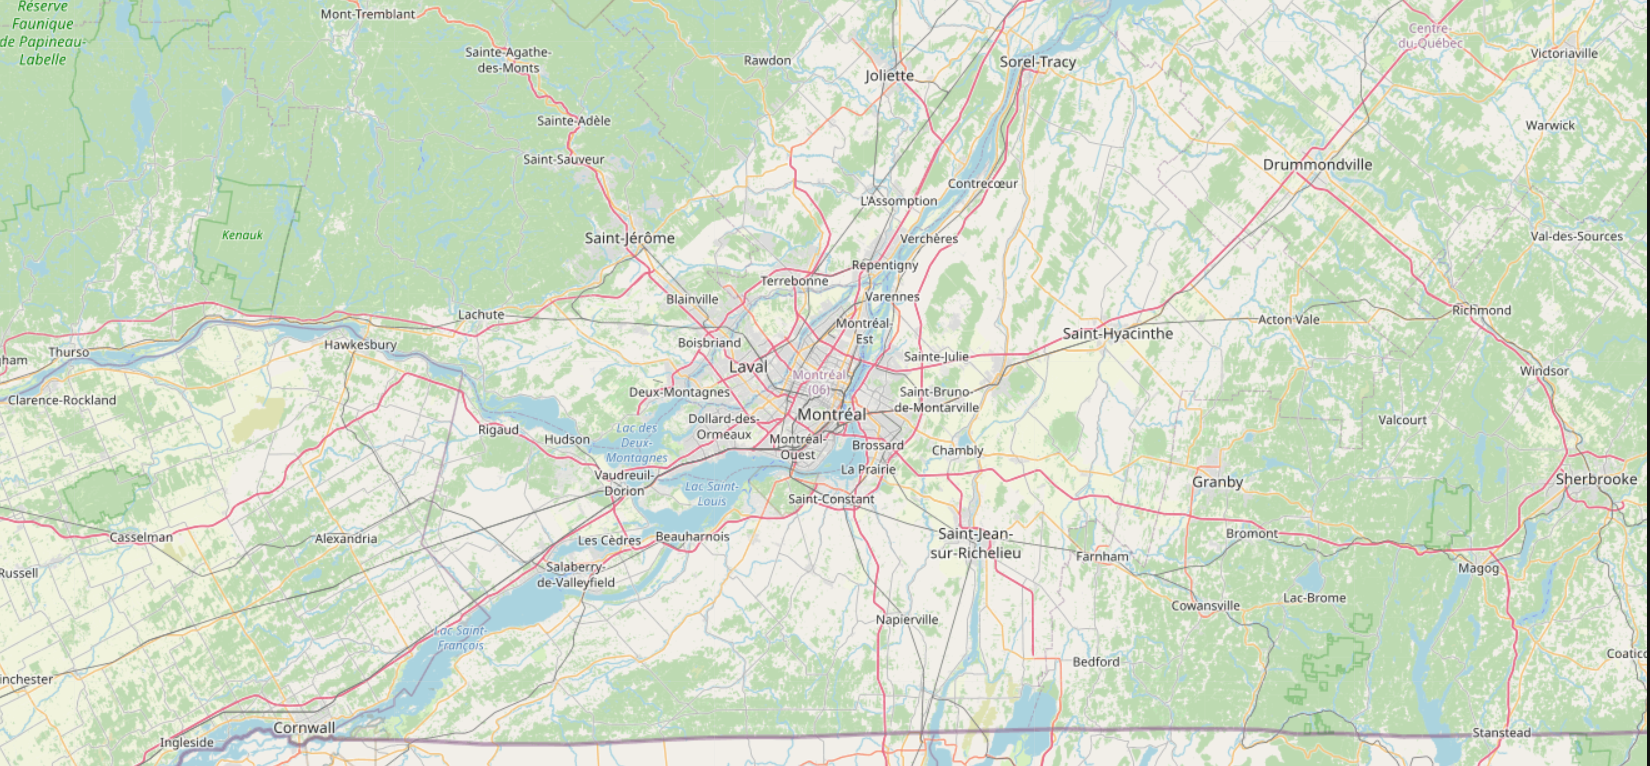